# Risk Sharing and Moral Hazard

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

# Risk-sharing review


### A simple employment contract

Employer hires worker to perform a task that has a stochastic outcome.  Project can either:
- with probability $p$ succeeds to yield $X_s$
- with probability $1-p$ fails to yield $X_f < X_S$

There are two states of the world lebeled $s$ and $f$.  The expected return from the project is: $E(X|p) = p \cdot X_s + (1-p) \cdot X_f $

## Example

$X_s = 100$, $X_f = 0$,  $p = 0.8$

$E(X|p) = 0.8 \cdot 100 + 0.2 \cdot 0 = 80 $

## Risk neutral employer and risk-averse agent

Contract design problem: how to allocate claims to stochastic output between:

- Principal (Employer):  $(X_s-c_s, X_f-c_f)$ 
- Agent (worker):  $(c_s, c_f)$

The agent maximize the von-Neumann-Morgenstern expected utility:

$Eu(c|p) = p u(c_s) + (1-p) u(c_f)$

### Monopoly Contract design Example 


$$\max_{c_s,c_f} \ \ E(X|p) - E(c|p)$$

$$Eu(c|p) \ge \bar u$$

Lagrangian:
$$\mathcal{L}(c_s, c_f,\lambda) =  p \cdot (X_s-c_s) + (1-p) \cdot (X_f-c_f) \\
-\lambda \left( \bar u - p \cdot  u(c_s) - (1-p) u(c_f) \right)$$

#### Monopoly FOC 

for state-contingent claim in state $s$:  $p \cdot \lambda \cdot u'(c_s)-p =0 $

Rearranging for $i=s,f$

$$ \frac{1}{u'(c_s)} = \lambda  = \frac{1}{u'(c_f)} $$

This implies agent should be fully insured:  $c_s = c_f = c^*$

substitute $c_s = c_f = c^*$ into agent participation: 

If for example $u(c) = \frac{c^{\alpha}}{\alpha}$ and $\alpha=\frac{1}{2}$ then $2\sqrt{\bar c^*} = \bar u$

Monopoly contract pays worker a fixed wage determined by their reservation utility: 
$c^* = \left (\frac{\bar u}{2} \right )^2$

For example if the worker ran the project without insurance:

$\bar u = 0.8 \cdot 2 \sqrt(100) + 0.2 2 \sqrt(0) = 16$ utils 

The monopoly insurer offers safe contract: $c_f=c_s=64$

Firm then earns $X_s - c_s = 100 - 64 = 36$ or $X_f - c_f = 0 - 64 = -64$

For expected return of $0.8 \cdot 64 + 0.2 (-36) = 44$

### Competitive Contract design
Employers compete for workers: 

$$\max_{c_s, c_f}  p \cdot  u(c_s) + (1-p) u(c_f)$$

subject to then employer participation (zero-profit) constraint:

$$p \cdot (X_s-c_s) + (1-p) \cdot (X_f-c_f) \geq 0$$

### Competitive Contract design Example 

$$\mathcal{L}(c_s, c_f,\lambda) =  p \cdot  u(c_s) + (1-p) u(c_f) \\
+\lambda \left( p \cdot (X_s-c_s) - (1-p) \cdot (X_f-c_f) \right)$$

Same FOC as above imply:  $c_s = c_f$

substitute this now into employer participation to get:   $c_f=c_s = E(X|p)$

In our example agent is paid  $c_f=c_s = 80$

And firm earns $(X_s-c_s)=100-80 = 20$ and $(X_f-c_f)= 0 - 80 = -80$ for expected return of zero.

### Competitive financing

A financial contract is modeled just like this last example (with a slight rewriting and reinterpretation of the Bank (i.e. the principal's) participation constraint).  

Suppose agent has access to the same stochastic project above but can only get it started with lump sum investment $I$.

$$\max_{c_s, c_f}  p \cdot  u(c_s) + (1-p) u(c_f)$$

subject to then employer participation (zero-profit) constraint:

$$p \cdot (X_s-c_s) + (1-p) \cdot (X_f-c_f) \geq I(1+r)$$

Exactly the problem above only that the participation constraint includes a term to cover the opportunity cost of funding.

Lagrangian: 

$$\mathcal{L}(c_s, c_f,\lambda) =  p \cdot  u(c_s) + (1-p) u(c_f) \\
+\lambda \left( I(1+r) - p \cdot (X_s-c_s) - (1-p) \cdot (X_f-c_f) \right)$$

FOC again imply contract keeps agent's consumption steady at:  $c_s = c_f = c^*$

Bank just breaks even: $E(X|p) - E(c|p) = I(1+r)$

**Example:  Suppose loan finance costs $I(1+r) = 70$**

$E(c|p) = E(X|p) - I(1+r)$

$E(c|p) = 80 - 70 = 10$


Can think of contract as a loan with state-contingent repayments:

$X_s - c_s - I(1+r) = 100 - 10 - 70 = 20$

$X_f - c_f - I(1+r) =   0 - 10 - 70 = -80$

Bank breaks even: $0.8 \cdot 20 + 0.2 \cdot (-80) = 0$

Can extend to many states of the world:

$$E(X|e) = \sum_i {X_i \cdot f(X_i|e)}$$

In [18]:
alpha = 0.25

In [19]:
def u(c, alpha=alpha):
    return (1/alpha)*c**alpha

def E(x,p):
    return p*x[1] + (1-p)*x[0]

def EU(c, p):
    return p*u(c[1]) + (1-p)*u(c[0])

def budgetc(c0, p, x):
    return E(x,p)/p - ((1-p)/p)*c0

def indif(c0, p, ubar):
    return (alpha*(ubar-(1-p)*u(c0))/p)**(1/alpha)

def IC(c0,p,q,B):
    '''incentive compatibility line'''
    return (alpha*(u(c0)+B/(p-q)))**(1/alpha)

In [20]:
def Bopt(p,x):
    '''Bank profit maximum'''
    return (alpha*EU(x,p))**(1/alpha)

def Copt(p,x):
    '''Consumer utility maximum'''
    return E(x,p)
    
    

In [21]:
x = [15,90]
p = 0.6

In [22]:
EU([36,36],p)

9.797958971132712

# Moral Hazard or Hidden Actions

or Hidden Actions model


### Risk sharing vs. incentives

Stiglitz (1974), Holmstrom (1979), Grossman and Hart (1983)


Agent's private benefit from avoiding diligence or effort is B (extra disutility from high vs. low effort).  

Effort is non-contractible and $B$ cannot be observed/seized. Effort-contingent contracts not possible.

Only outcone-contingent contracts can be used. 

## Hidden actions

Now agent's unobserved (or more to the point non-verifiable) effort levels determines success probability: 
 - High  $e_H$  (probability of success $p$).
 - Low $e_L$ (probability of success $q$).  
 - Can no longer offer earlier risk-sharing contract ($c=10$) as cnnot be sure success probability is $p$
  
 Example $q=0.6$ versus $p=0.8$
     - E(X|p) - E(c|p) - I(1+r) =  80-10-70 = 0 (bank breaks even)
     - E(X|q) - E(c|q) - I(1+r) =  60-10-70 = -20 (bank loses money)

### On the other hand full-residual claimancy contract imposes too much risk
 
 - Full residual claimant when fixed repayment $I(1+r)$
     - $c_s = 100-70 = 30$
     - $c_f = -70 = -70$
     - $0.8 (30) + 0.2(-70) = 24 - 14 = 10$

- But this imposes a lot of risk  (actually here not even defined since u(-70) is 'catastrophic')
 
- Need to find balance between risk sharing and incentives

## Incentive compatibility constraint:

$$EU(c|p) \geq EU(c|q) + B$$

In 2 outcome case can be re-arranged to:

$$u(c_1) \geq u(c_0) + \frac{B}{p-q}$$

## Interactive indifference curve diagram

In [23]:
p = 0.5
q = 0.4
cmax = 100
B = 1.5

In [24]:
IC(2,p,q,B)

595.1534438537282

In [25]:
def consume_plot(p,q,B,ic=False):
    c0 = np.linspace(0.1,200,num=100)
    
    #bank optimum
    c0e = Bopt(p,x)
    c1e = c0e
    uebar = EU([c0e,c1e],p)
    idfc = indif(c0, p, uebar)
    budg = budgetc(c0, p, [c0e,c1e])
    
    #consumer optimum
    c0ee = Copt(p,x)
    c1ee = c0ee
    uemax = EU([c0ee,c1ee],p)
    idfcmax = indif(c0, p, uemax)
    zerop = budgetc(c0, p, x)
    icline = IC(c0,p,q,B)
       
    
    fig, ax = plt.subplots(figsize=(10,10))
    if ic:
        ax.plot(c0,icline)
    ax.plot(c0, budg, lw=2.5)
    ax.plot(c0, zerop, lw=2.5)
    ax.plot(c0, idfc, lw=2.5)
    #ax.plot(c0, idfcmax, lw=2.5)
    ax.plot(c0,c0)
    #ax.vlines(c0e,0,c2e, linestyles="dashed")
    #ax.hlines(c1e,0,c1e, linestyles="dashed")
    ax.plot(c0e,c1e,'ob')
    ax.plot(c0ee,c1ee,'ob')
    ax.plot(x[0],x[1],'ob')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel(r'$c_0$', fontsize=16)
    ax.set_ylabel('$c_1$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

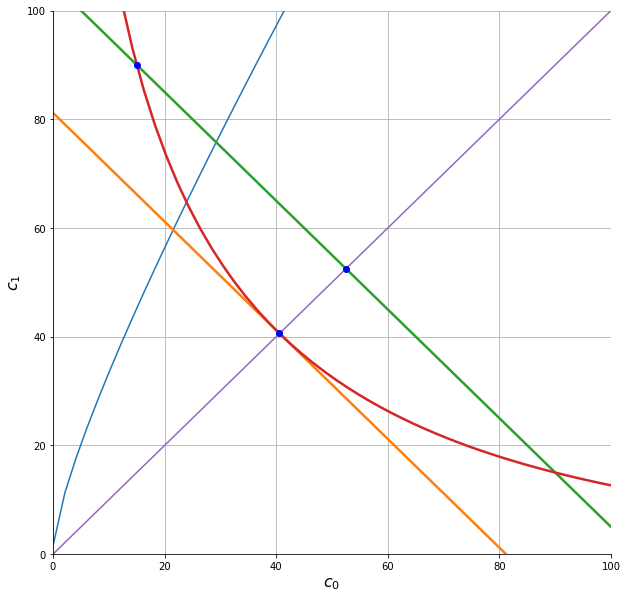

<Figure size 432x288 with 0 Axes>

In [26]:
consume_plot(p=0.5, q=0.30, B=0.5, ic=True)
plt.savefig('mhazard.png')

In [27]:
interact(consume_plot,p=fixed(0.5),q=(0.1,0.5,0.01),B=(0,3,0.1));

interactive(children=(FloatSlider(value=0.30000000000000004, description='q', max=0.5, min=0.1, step=0.01), Fl…

If we set this up and solve it as a Lagrangean (loosely following Holmstrom, 1979) we get a condition like this:

$$\frac{1}{u'(c_i)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x_i,e_L)}{f(x_i,e_H)}} \right ]  \text{ }\forall i
$$

In our two outcome case $p=f(x_1|e_H)$ and $q=f(x_1|e_L)$ and this becomes:

$$\frac{1}{u'(c_1)} = \lambda + \mu \cdot 
\left [ {1-\frac{q}{p}} \right ]  
$$

$$\frac{1}{u'(c_0)} = \lambda + \mu \cdot 
\left [ {1-\frac{1-q}{1-p}} \right ]  
$$

TODO:  
 - Functions to solve the two outcome cases (closed form possible, substitute IC into binding PC; or 2 FOC plus IC plus PC for $c_0, c_1, \lambda  \text{ and } \mu$).
 - Function to solve numerically for N outcomes (N FOCs and one participation constraint).
 - discuss how sensitive to distribution

Holmstrom's sufficient statistic

$$\frac{1}{u'(c)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x,y,e_L)}{f(x,y,e_H)}} \right ]  \text{ }\forall i
$$

In [11]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>